In [206]:
from IPython.display import Latex
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pylab import polyfit
import math
#plt.style.use(['seaborn-talk', 'seaborn-ticks'])
plt.style.use('seaborn-notebook')
plt.rc('axes', titlesize=25) 
plt.rc('axes', labelsize=18) 

# Aufgaben zur Vorlesung Modellbildung und Simulation 
## (Klassische Mechanik 2)

Lösen Sie die Aufgaben, indem Sie in eigenen Worten das Problem, das Modell, die gelösten Gleichungen und den verwendeten Algorithmus beschreiben. Visualisieren und diskutieren Sie die Ergebnisse und führen Sie eine kritische Analyse durch. Geben Sie den verwendeten Code zusammen mit der Lösung ab und führen Sie diesen in den Übungen vor. Sie können in Gruppen von bis zu drei Studierenden zusammenarbeiten. 
(Abgabe: 18.05.18)


## Keplerproblem
Zwei Massen M und m, die einen Abstand r zueinander besitzen, ziehen sich gegenseitig mit der Kraft

$$\vec{F}_G = −G\frac{Mm}{r^2} \vec{e}_r$$

an. $G$ ist die universelle Gravitationskonstante.

### Aufgabe 1. 
Im File Sat.txt sind die Umlaufzeiten $T$ und mittlere Radien $r$ der Umlaufbahnen von vier Satelliten angegeben (die einen Asteroiden umkreisen). Zeigen Sie, dass sich die Daten mit der Formel $T = Cr^n$ beschreiben lassen. Bestimmen Sie $n$ und $C$, indem Sie die Daten logarithmisch auftragen. Schätzen Sie den fehlenden Radius ab.

In [182]:
"""
evaluate polynomial given by constants at a point x
"""
def poly(constants, x):
    result = 0
    for i,c in enumerate(np.flip(np.array(constants), axis = 0)):
        result += c*x**i
    return result

In [183]:
# import data
data = pd.read_csv('Sat.txt',header = 0)
data1 = data.values[[0,1,2,4],:]
data.head()

,T in a,r in Gm
0,0.44,0.088
1,1.61,0.208
2,3.88,0.374
3,6.20,0.000
4,7.89,0.600


$$T = Cr^n$$

$$ln(T) = ln(Cr^n)$$

$$ln(T) = ln(C)+n \cdot ln(r)$$

$$T' = C' +n \cdot r'$$

Aus dieser Gleichung folgt, dass unsere transformierte Funktion $ln(T)$ in einem Log-log-Plot eine Gerade sein muss mit der Konstanten $ln(C)$ und der Steigung $n$.

Die Rücktransformation erfolgt durch die exponential Funktion $e^{x'} = x$ mit $x'$ im transformierten Raum.

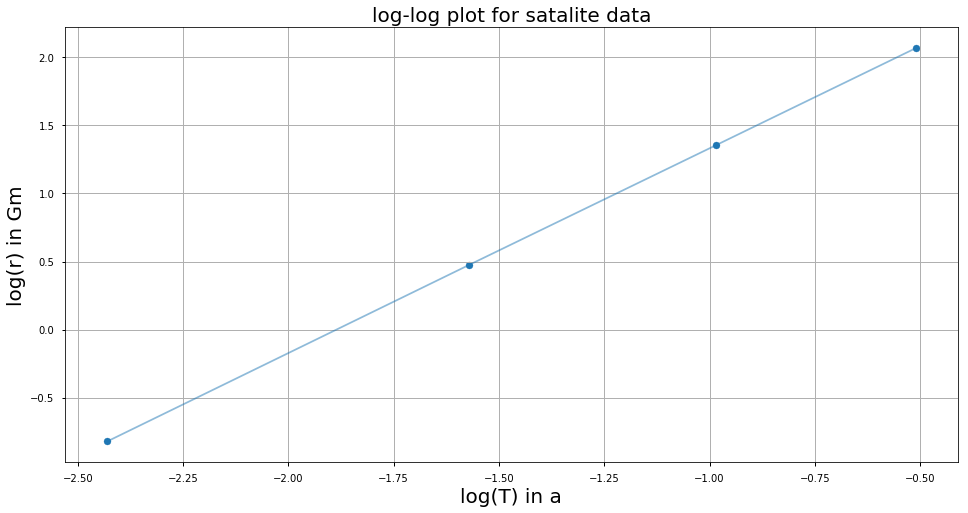

In [184]:
plt.figure(figsize=(16,8))
plt.scatter(np.log(data1[:,1]),np.log(data1[:,0]))
plt.plot(np.log(data1[:,1]),np.log(data1[:,0]), alpha = 0.5)
plt.title('log-log plot for satalite data')
plt.xlabel('log(T) in a')
plt.ylabel('log(r) in Gm')
plt.grid(True)
plt.show()

In [185]:
# using two different degrees for interpolation
deg1_log = polyfit(np.log(data1[:,0]),np.log(data1[:,1]),deg=1)
print('deg1:', deg1_log)

deg2_log = polyfit(np.log(data1[:,0]),np.log(data1[:,1]),deg=2)
print('deg2:',deg2_log)

deg1: [ 0.66507599 -1.88529751]
deg2: [ 9.81991603e-04  6.63917804e-01 -1.88612657e+00]


An der Interpolation mit den beiden Polynomen und dem verschwindenen quadratischen Term in der Interpolation zweiten Grades, kann man erkennen, dass es sich bei der Funktion um eine Gerade mit geringem Rauschen handelt (Anderenfalls wäre die Konstante des quadratischen Terms im Betrag signifikant größer).
Da es sich bei dem Plot um einen log-log Plot handelt, folgt daraus, dass die untransformierte Funktion als eine einfache Exponential Funktion der Form $T = Cr^n$ dargestellt werden kann.

In [186]:
print('missing value for satalite data:',np.round(math.e**poly(deg1_log,np.log(6.2)),3))

missing value for satalite data: 0.511


Aus Interpolation der gegebenen Werte ergibt sich für den fehlenden Radius ein ungefährer Wert von $0.511Gm$

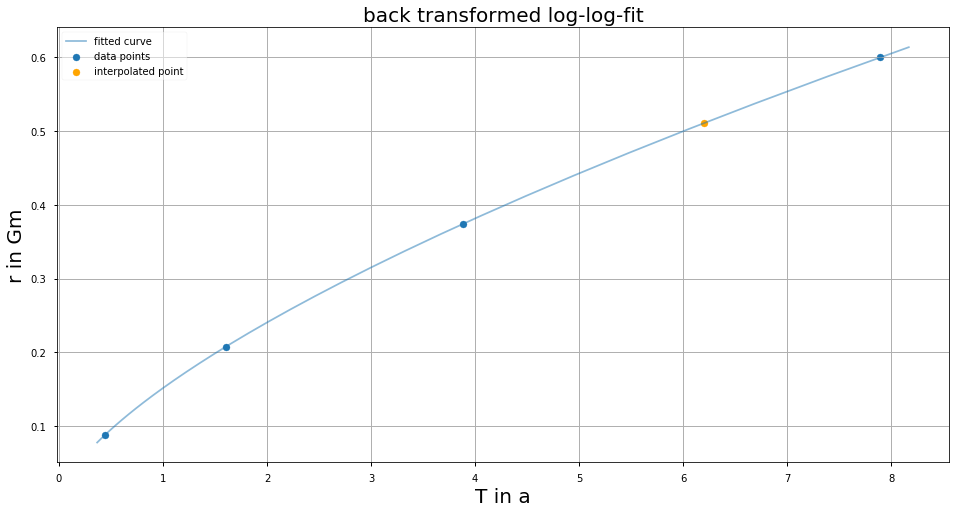

In [187]:
# fitting log log data
deg1_log = polyfit(np.log(data1[:,0]),np.log(data1[:,1]),deg=1)

# predict missing value
new_point = math.e**poly(deg1_log,np.log(6.2))
plt.figure(figsize=(16,8))

# plot back transformed log log interpolation and data points, including missing point
X = [i for i in np.arange(-1,np.log(9),0.1)]
plt.plot([math.e**x for x in X],[math.e**poly(deg1_log,x) for x in X], alpha = 0.5)
plt.scatter(data1[:,0],data1[:,1])
plt.scatter(data.values[3,0],new_point,color = 'orange')
plt.title('back transformed log-log-fit')
plt.xlabel('T in a')
plt.ylabel('r in Gm')
plt.legend(['fitted curve','data points','interpolated point'], framealpha = 0.5, loc = 0)
plt.grid(True)
plt.show()

### Aufgabe 2
Schreiben Sie ein Programm, das die Differentialgleichung 

$$m\ddot{\vec{r}} = -G\frac{Mm}{r^3}\vec{r}$$

$$\dot{\vec{r}} = \vec{v}$$
$$\Rightarrow m\dot{\vec{v}} = -G\frac{Mm}{r^3}\vec{r}$$

löst und visualisieren Sie die Bahnkurve der Erde um die Sonne. Verwenden Sie als Anfangsgeschwindigkeit $(0.0, 29.8)\cdot 10^3\frac{m}{s}$ und den Anfangsort der Erde $(1.4960, 0.0)\cdot 10^{11}\frac{m}{s}$ (Die Sonne ruhe anfänglich im Ursprung). Uberprüfen Sie die Impuls-, Drehimpuls- und Energieerhaltung numerisch.

Energie:
$$E_{kin} = \frac{1}{2}mv^2$$

$$E_{pot} = \frac{-G mM}{r}$$

Impuls:
$$ E_{kin} = \frac{p^2}{2m}$$

$$\Rightarrow p = \sqrt{2mE_{kin}}$$

$$\vec{p} = m\vec{v}^2$$

Drehimpuls:
$$\vec{L} = \vec{p} \times \vec{r}$$

In [188]:
GM = 4*np.pi*np.pi 
#GM = 1.98855 * 10**30# G*Msun
m = 1

def earth(id, r, v, t):            # return the eqns of motion
    if (id == 0): return v         # velocity, dr/dt
    s = np.linalg.norm(np.array([r[0],r[1],0]))  # $s=|\vec{r}|$
    return -GM*r/(s*s*s)           # accel dv/dt, faster than s**3  

def leapfrog(lfdiffeq, r0, v0, t, h):       # vectorized leapfrog
    """ vector leapfrog method using numpy arrays.
        It solves general (r,v) ODEs as: 
        dr[i]/dt = f[i](v), and dv[i]/dt = g[i](r).
        User supplied lfdiffeq(id, r, v, t) returns
        f[i](r) if id=0, or g[i](v) if id=1.
        It must return a numpy array if i>1 """
    hh = h/2.0
    r1 = r0 + hh*lfdiffeq(0, r0, v0, t)     # 1st: r at h/2 using v0    @\lbl{line:lf1}@
    v1 = v0 +  h*lfdiffeq(1, r1, v0, t+hh)  # 2nd: v1 using a(r) at h/2 @\lbl{line:lf2}@
    r1 = r1 + hh*lfdiffeq(0, r0, v1, t+h)   # 3rd: r1 at h using v1     @\lbl{line:lf3}@
    return r1, v1

def trajectory_leapfrog(ode, r, v, t_start, t_end , h):
    result = [r,v]
    e_kin = [0.5*m*np.linalg.norm(v)**2]
    e_pot = [-m*GM/np.linalg.norm(r)]
    p = [np.array(m*v)]
    L = [np.cross(r,p[-1])]
    #L = [m*np.linalg.norm(r)*np.linalg.norm(v)]
    for t in np.arange(t_start, t_end, h):
        r,v = leapfrog(ode, r, v, t, h)
        result += [r,v]
        e_kin += [0.5*m*np.linalg.norm(v)**2]
        e_pot += [-m*GM/np.linalg.norm(r)]
        p += [np.array(m*v)]
        L += [np.cross(r,p[-1])]
        #L += [m*np.linalg.norm(r)*np.linalg.norm(v)]
    return np.array(result).reshape(-1,4), np.array(e_kin), np.array(e_pot), p, np.array(L)

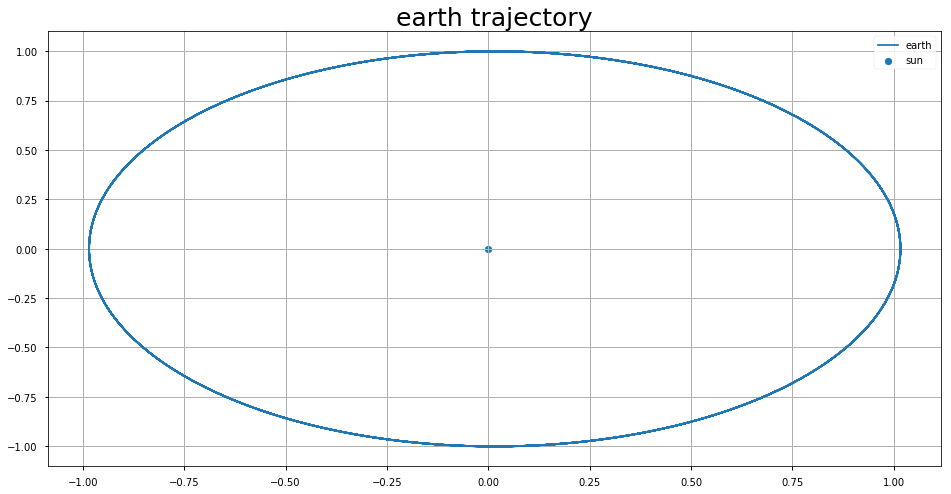

In [212]:
# initial x,y position for earth   
r = np.array([1.4960*10**11,0])    
v = np.array([0,29.8*10**2])

#test coordinates
r = np.array([1.017, 0.0])    
v = np.array([0.0, 6.179])

t, h = 0.0, 0.01
t_start = 0.
t_end = 10
sol, e_kin, e_pot, p, L = trajectory_leapfrog(earth, r, v, t_start, t_end, h)

plt.figure(figsize=(16,8))
plt.plot(sol[:,0],sol[:,1])
plt.scatter(0,0)
plt.legend(['earth','sun'])
plt.title('earth trajectory')
plt.grid(True)
#plt.axis('off')
plt.show()

Elliptische Umlaufbahn der Erde um die Sonne. Die Sonne wird dabei als Fixpunkt angenommen.

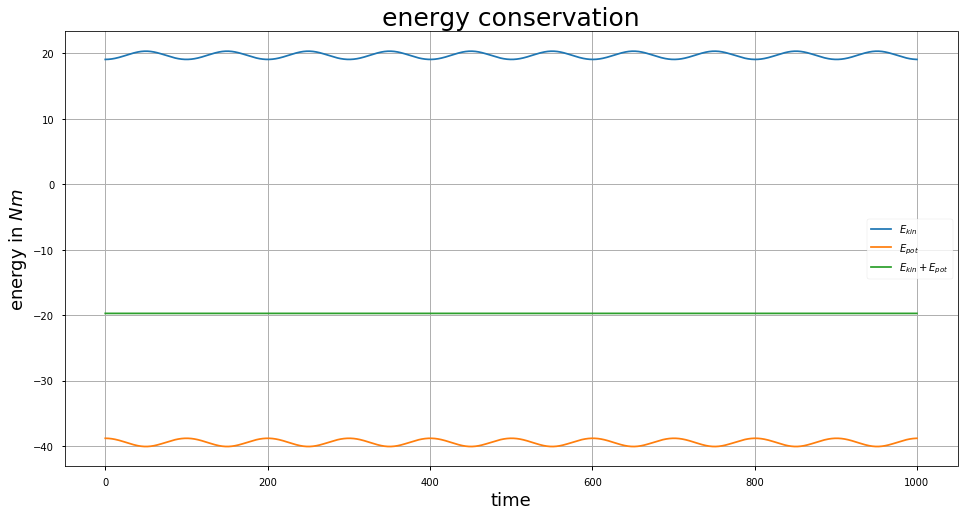

In [213]:
plt.figure(figsize=(16,8))
plt.plot(e_kin)
plt.title('energy conservation')
plt.xlabel('time')
plt.ylabel('energy in $Nm$')
plt.plot(e_pot)
plt.plot(np.add(e_kin,e_pot))
plt.legend([r'$E_{kin}$',r'$E_{pot}$',r'$E_{kin}+E_{pot}$'])
plt.grid(True)
plt.show()

In dem Plot kann man erkennen, wie die potentielle Energie und die kinetische Energie mit der Zeit fluktuieren, in der Summe aber konstant sind, wie wir nach dem Energieerhaltungssatz erwarten würden.

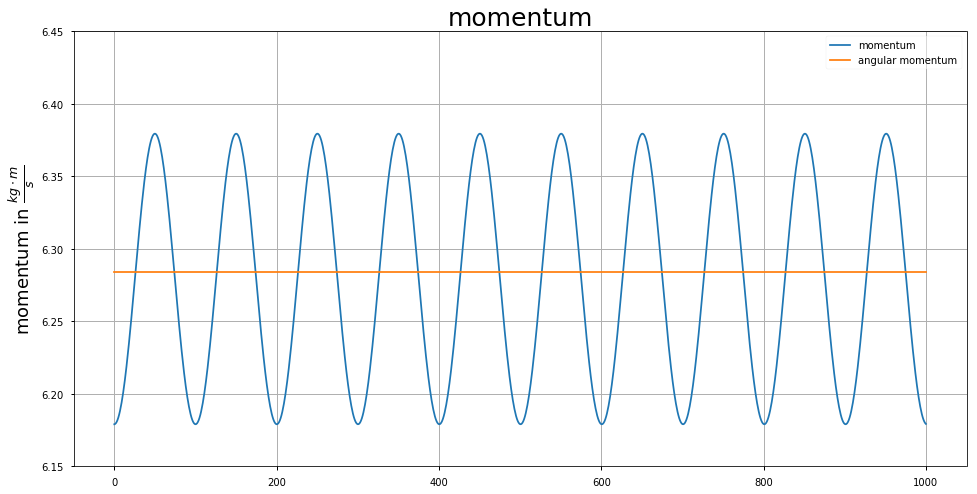

In [214]:
plt.figure(figsize=(16,8))
plt.plot([np.linalg.norm(P) for P in p])
plt.plot(L)
plt.title('momentum')
plt.ylabel('time')
plt.ylabel(r'momentum in $\frac{kg \cdot m}{s}$',)
plt.legend(['momentum','angular momentum'], framealpha = 0.5)
plt.grid(True)
plt.ylim(6.15,6.45)
plt.show()

Der Drehimpuls ist konstant, der Impuls schwankt über das Jahr hinweg, was an der schwankenden kinetischen Ernergie liegt. Dies liegt daran, dass wir die Sonne als einen Fixpunkt annehmen, der nicht durch die Erde beeinflusst wird, was physikalisch inkorrekt ist. Bezieht man die Sonne mit in die Impulserhaltung ein würde man sehen, dass sich die Summe der Impulse nicht ändert.

### Aufgabe 3
Überprüfen Sie die Impuls-, Drehimpuls- und Energieerhaltung analytisch. Verwenden Sie dazu Polarkoordinaten und leiten Sie die Bewegungsgleichungen in Polarkoordinaten her:

$$ m(\ddot{r}-r\dot{\theta}^2) = -G \frac{mM}{r^2}$$

$$m(r\ddot{\theta}+2\dot{r}\dot{\theta})= 0$$

In [192]:
# Ekaterina

### Aufgabe 4
Variieren Sie die Anfangsgeschwindigkeit der Erde und beschreiben Sie die verschiedenen Bahnformen, die sich ergeben.

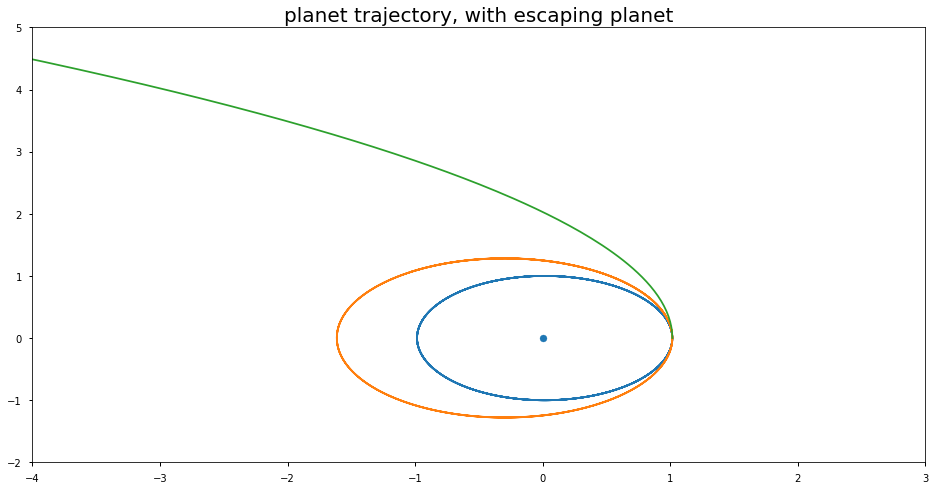

In [193]:
r= np.array([1.017, 0.0])    
v_list = [np.array([0.0, 6.179]),np.array([0.0, 6.9]),np.array([0.0, 8.8])]
plt.figure(figsize=(16,8))
for v in v_list:
    t, h = 0.0, 0.01
    t_start = 0.
    t_end = 5
    sol, e_kin, e_pot, p, L = trajectory_leapfrog(earth, r, v, t_start, t_end, h)
    plt.plot(sol[:,0],sol[:,1])
plt.scatter(0,0)
plt.xlim(-4,3)
plt.ylim(-2,5)
plt.title('planet trajectory, with escaping planet')
plt.show()

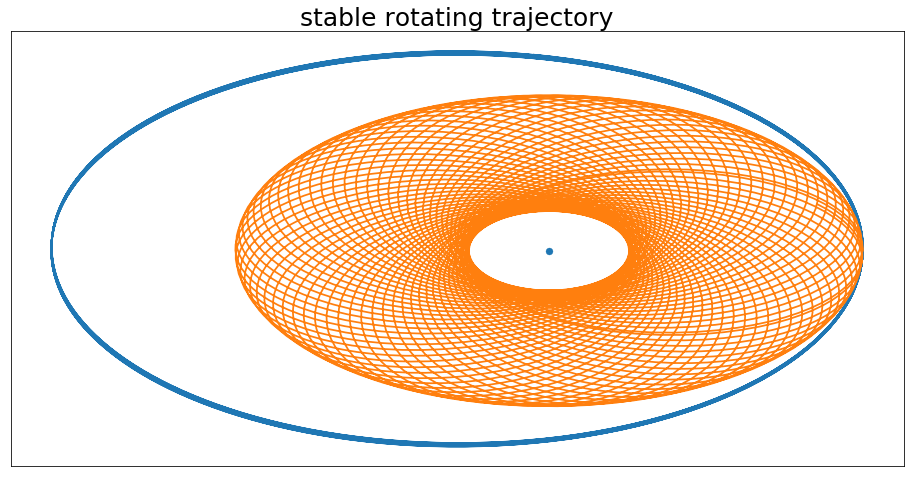

In [216]:
r= np.array([1.017, 0.0])    
v_list = [np.array([0.0, 6.9]),np.array([0.0, 4])]
plt.figure(figsize=(16,8))

for v in v_list:
    t, h = 0.0, 0.01
    t_start = 0.
    t_end = 38
    sol, e_kin, e_pot, p, L = trajectory_leapfrog(earth, r, v, t_start, t_end, h)
    plt.plot(sol[:,0],sol[:,1])
plt.scatter(0,0)
plt.xticks([], [])
plt.yticks([], [])
plt.title('stable rotating trajectory')
plt.show()

Für eine bestimmte Range entstehen stabile Umlaufbahnen mit unterschiedlichen Halbachsen. Ab einem bestimmten Punkt ist die Fluchtgeschwindigkeit erreicht und der Planet kann nicht mehr von der Sonne eingefangen werden (Die Bewegungen teilen sich hier nochmal in Parabolische und hyperbolische Trajektorien auf). Unterschreitet der Planet eine bestimmte Geschwindigkeit fangen die Halbachsen an um das Zentralgestirn zu rotieren. Sobald ein Grenzert unterschritten wird, fällt der Planet so nah in die Sonne, dass er wiederum aus der Umlaufbahn katapultiert wird und das System verlässt. Im Extremfall stürzt der Planet einfach nur direkt in die Sonne.

In den verschiedenen Plots sind die unterschiedlichen Umlaufbahnen nur als Vergleich geplotet, die Bahnen beeinflussen sich nicht

### Aufgabe 5
Beschreiben Sie mit Hilfe Ihres Programms die Bewegung zweier fast gleich großer Massen (Zweikörperproblem). Denken Sie an die Impulserhaltung!

In [278]:
#this is code we did for numerik
G = 1

def ODEplanets(t, y):
    '''
    berechnet die rechte Seite der Differentialgleichung 
    Zunächst kommen alle Variablen (x,y,vx,vy) für den ersten Planeten, dann alle 4 für den zweiten,... 
    :param t: aktueller zeitpunkt
    :param y: aktueller y-Wert (n Komponenten)
    :return: rechte Seite f der Dgl. y'=f(t,y)
    '''
    _y = y.reshape(-1,4)
    # Daten der Planeten
    #G = 6.673E-20  # Gravitationskonstante
    
    #planets = planetdata()
    a_planets = np.zeros(_y.shape)[:,:2]
    
    for i in range(_y.shape[0]):
        for j in range(_y.shape[0]):
            if i != j:
                a_planets[i,:] += -G * mass[j] *(_y[i,:2]-_y[j,:2])/(np.linalg.norm(_y[i,:2]-_y[j,:2])**3)
    return np.transpose(np.array([_y[:,2],_y[:,3],a_planets[:,0],a_planets[:,1]])).flatten()

def rk4(y, t, h, ode):
    # YOUR CODE HERE
    k1 = ode(t,y)
    k2 = ode(t + h/2, y + h/2*k1)
    k3 = ode(t + h/2, y + h/2*k2)
    k4 = ode(t + h, y + h*k3)
    return y + h * (k1/6 + k2/3 + k3/3 + k4/6)

def integrateall(method, ode, y0, t0, tend, N, intermediate=False):
    """
    :param method: Enschrittverfahren
    :param ode: Rechte seite der Dgl
    :param y0: Anfangswert
    :param t0: Anfangszeitpunkt
    :param tend: Endzeitpunkt
    :param N: Anzahl der Schritte
    :param intermediate: True, wenn zum Plotten der Lösung auch die Ergebnisse der Zwischenschritte zurückgegeben werden sollen
    :return: Lösung am Endzeitpunkt (bzw. zusätzlich an den Zwischenzetpunkten, wenn intermediate =True)
    """
    yvals = []
    tvals = []
    h = (tend - t0)/N
    yend = y0
    t = t0
    for i in range(N):
        t = t + h
        yend = method(yend, t, h, ode)
        yvals += [yend]
        tvals += [t]
            
    if intermediate:
        return np.array(yvals), tvals
    else:
        return yend
    
def ada_integrateall(method, ode, y0, t0, tend, h, intermediate=False):
    """
    :param method: Enschrittverfahren
    :param ode: Rechte seite der Dgl
    :param y0: Anfangswert
    :param t0: Anfangszeitpunkt
    :param tend: Endzeitpunkt
    :param N: Anzahl der Schritte
    :param intermediate: True, wenn zum Plotten der Lösung auch die Ergebnisse der Zwischenschritte zurückgegeben werden sollen
    :return: Lösung am Endzeitpunkt (bzw. zusätzlich an den Zwischenzetpunkten, wenn intermediate =True)
    """
    yvals = []
    tvals = []
    yend = y0
    t = t0
    while t <= tend:
        t = t + h
        yend = method(yend, t, h, ode)
        yvals += [yend]
        tvals += [t]
        #ada h
        min_dist = np.inf
        y_tmp = yend.reshape(-1,4)[:,:2]
        for i in range(y_tmp.shape[0]):
            for j in range(i):
                dist = np.linalg.norm(y_tmp[i,:]-y_tmp[j,:])
                if dist < min_dist:
                    min_dist = dist
        h = min_dist/1000
        
    if intermediate:
        return np.array(yvals), tvals
    else:
        return yend

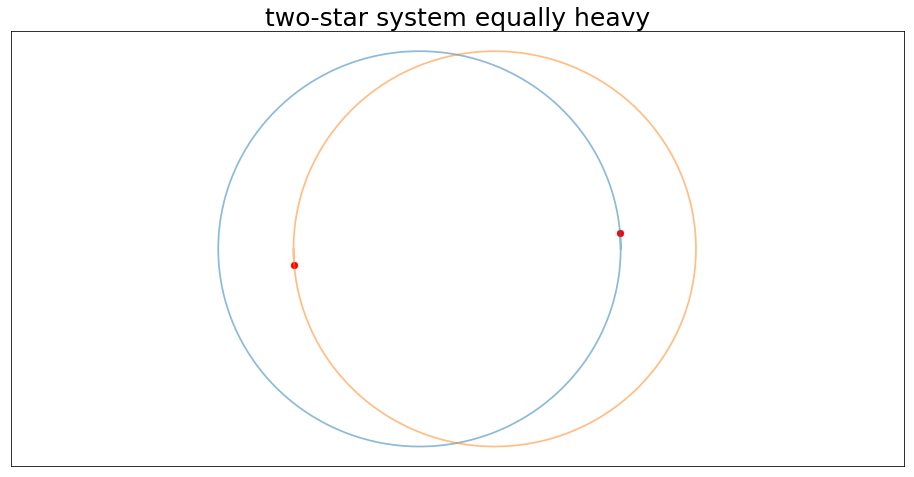

In [349]:
#def integrateall(method, ode, y0, t0, tend, N, intermediate=False)
_mass = 4*np.pi*np.pi 
mass = [_mass,_mass]
v = 4.8
y_0 = np.array([[0.0, 0.0, 0.0, v],[-1.017, 0.0, 0.0, -v]]).flatten()
y,t = integrateall(rk4, ODEplanets, y_0, 0, 1., 20000, intermediate=True)
#y,t = ada_integrateall(rk4, ODEplanets, y_0, 0, 1., 0.1, intermediate=True)

z = y.reshape(y.shape[0],-1,4)[:,:,:]
s = 2
plt.figure(figsize=(16,8))

for i in range(z.shape[1]):
    z1 = z[:,i,:]
    plt.plot(z1[:,0],z1[:,1], alpha=0.5)
    plt.axis('equal')
    plt.scatter(z1[-1,0],z1[-1,1], color = 'red')
plt.title('two-star system equally heavy')
plt.xticks([], [])
plt.yticks([], [])
plt.show()

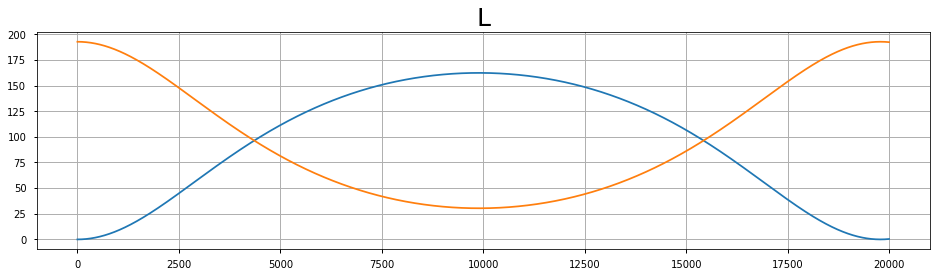

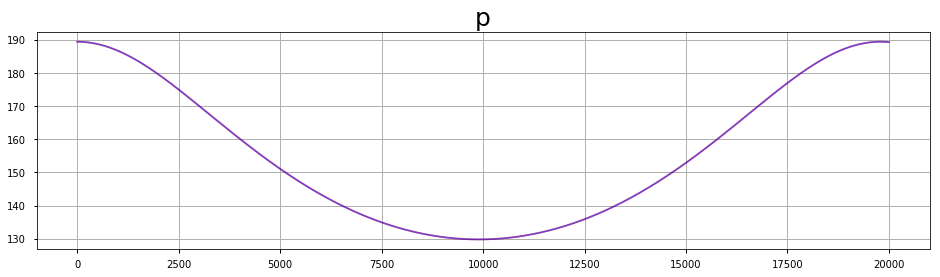

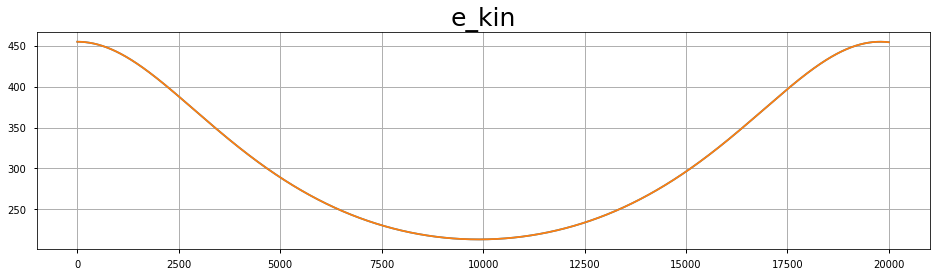

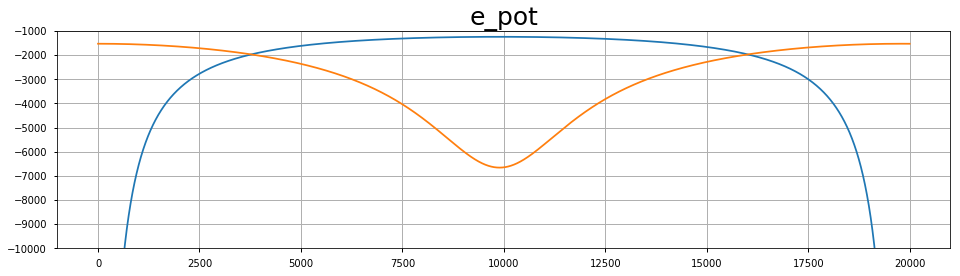

In [371]:
z[:,:]
e_kin = [[],[]]
e_pot = [[],[]]
p = [[],[]]
L = [[],[]]
m = _mass

for x in z:
    for i in range(x.shape[0]):
        r,v = x[i,:2],x[i,2:]
        #print(x,'\n\n',r,'\n\n',v,'\n\n')
        e_kin[i] += [0.5*m*np.linalg.norm(v)**2]
        e_pot[i] += [-m*GM/np.linalg.norm(r)]
        p[i] += [np.array(m*v)]
        L[i] += [np.cross(r,p[i][-1])]

plt.figure(figsize=(16,4))
plt.title('L')
plt.plot(L[0])
plt.plot(L[1])
plt.grid(True)
plt.show()

plt.figure(figsize=(16,4))
plt.title('p')
plt.plot([np.linalg.norm(P) for P in p[0]], alpha = 0.5, color ='red')
plt.plot([np.linalg.norm(P) for P in p[1]], alpha = 0.5, color ='blue')
plt.grid(True)
plt.show()

plt.figure(figsize=(16,4))
plt.title('e_kin')
plt.plot(e_kin[0])
plt.plot(e_kin[1])
plt.grid(True)
plt.show()

plt.figure(figsize=(16,4))
plt.title('e_pot')
plt.plot(e_pot[0])
plt.plot(e_pot[1])
plt.grid(True)
plt.ylim(-10000,-1000)
plt.show()

In [322]:
e_pot

[-129882.52733240585,
 -1532.5661334616034,
 -64946.87158968152,
 -1532.7853157642105,
 -43304.14419925775,
 -1533.1506355058723,
 -32484.647526706005,
 -1533.662116649932,
 -25994.441610207,
 -1534.3197929589867,
 -21668.879436302737,
 -1535.1237082080065,
 -18580.25483712906,
 -1536.07391645721,
 -16264.714465320321,
 -1537.1704823838695,
 -14464.561786160659,
 -1538.413481672035,
 -13025.178674894692,
 -1539.8030014590167,
 -11848.171597717615,
 -1541.3391408373136,
 -10867.94470261654,
 -1543.0220114105337,
 -10039.085330127897,
 -1544.8517379017367,
 -9329.155734037651,
 -1546.8284588125057,
 -8714.368114035948,
 -1548.9523271309745,
 -8176.881511331227,
 -1551.2235110869412,
 -7703.052741284837,
 -1553.642194952146,
 -7282.270348655025,
 -1556.2085798837375,
 -6906.156787633186,
 -1558.9228848089224,
 -6568.009947981736,
 -1561.7853473487694,
 -6262.404245227024,
 -1564.7962247791531,
 -5984.900504513872,
 -1567.9557950268243,
 -5731.831526995717,
 -1571.2643576986334,
 -5500.141

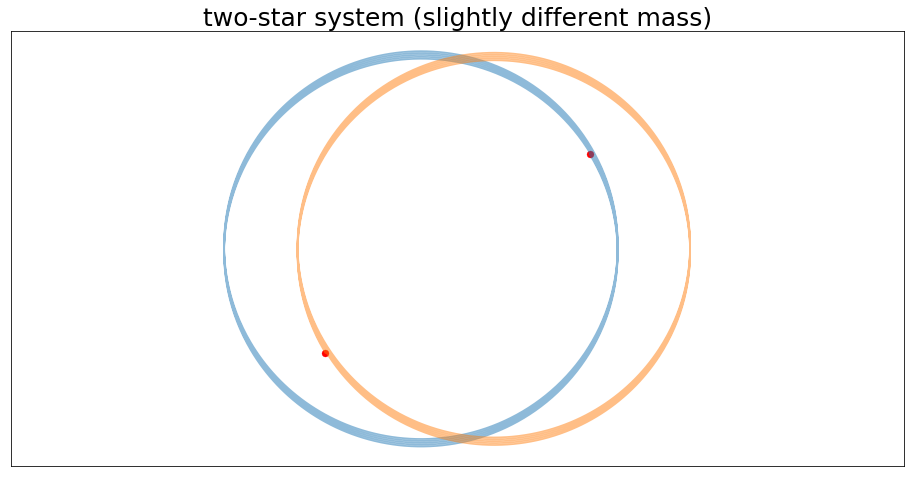

In [247]:
_mass = 4*np.pi*np.pi 
mass = [_mass,_mass+0.1]
v = 4.8
y_0 = np.array([[0.0, 0.0, 0.0, v],[-1.017, 0.0, 0.0, -v]]).flatten()
y,t = integrateall(rk4, ODEplanets, y_0, 0, 5, 2000, intermediate=True)

z = y.reshape(y.shape[0],-1,4)[:,:,:]
s = 2
plt.figure(figsize=(16,8))

for i in range(z.shape[1]):
    z1 = z[:,i,:]
    plt.plot(z1[:,0],z1[:,1], alpha=0.5)
    #plt.ylim(-s,+s)
    #plt.xlim(-s,+s)
    plt.axis('equal')
    plt.scatter(z1[-1,0],z1[-1,1], color = 'red')
plt.title('two-star system (slightly different mass)')
plt.xticks([], [])
plt.yticks([], [])
plt.show()

Man kann für beide Planeten schön die Umlaufbahnen erkennen. Dabei fällt auf, dass sie um einen gemeinsamen Schwerpunkt kreisen, der aber nicht um Zentrum der Umlaufbahnen steht, wie wir es für eliptische Umlaufbahnen auch erwarten.

Im Falle eines etwas schweren Körpers können wir in diesem Beispiel sehen, wie sich das ganze System verschiebt. Dies ist nicht zwingend der Fall.

### Aufgabe 6
Drei Sterne seien anfangs in Ruhe mit den folgenden Massen und Positionen (arbitrary
units)

|   | mass  | x  | y  |
|---|---|---|---|
| star 1  | 150  | 3  | 1  |
| star 2  | 200  | -1  | -2  |
| star 3  | 250  |  -1 |  1 |

(Die drei Sterne seien in der xy-Ebene.)

a)
Zeigen Sie, dass die Bewegungsgleichung fur Position $\vec{r_1}$ des ersten Sterns gegeben ist durch:

$$\ddot{\vec{r_1}} = Gm_2\frac{\vec{r_2}-\vec{r_1}}{\mid\vec{r_2}-\vec{r_1}\mid} + Gm_3\frac{\vec{r_3}-\vec{r_1}}{\mid\vec{r_3}-\vec{r_1}\mid}$$

und stellen Sie die Gleichungen fur $\vec{r_2}$ und $\vec{r_3}$ der beiden anderen Sterne auf.

b)
Setzen Sie G = 1 und schreiben Sie ein Programm, das die Bewegungsgleichungen löst. Plotten Sie y als Funktion von x und animieren Sie die Bewegung. Die Sterne bewegen sich sehr schnell, wenn sie sich nähern und sind sehr langsam, wenn sie weit voneinander entfernt sind. Eine adaptive Methode könnte deshalb nützlich sein.

In [199]:
# a) Ekaterian

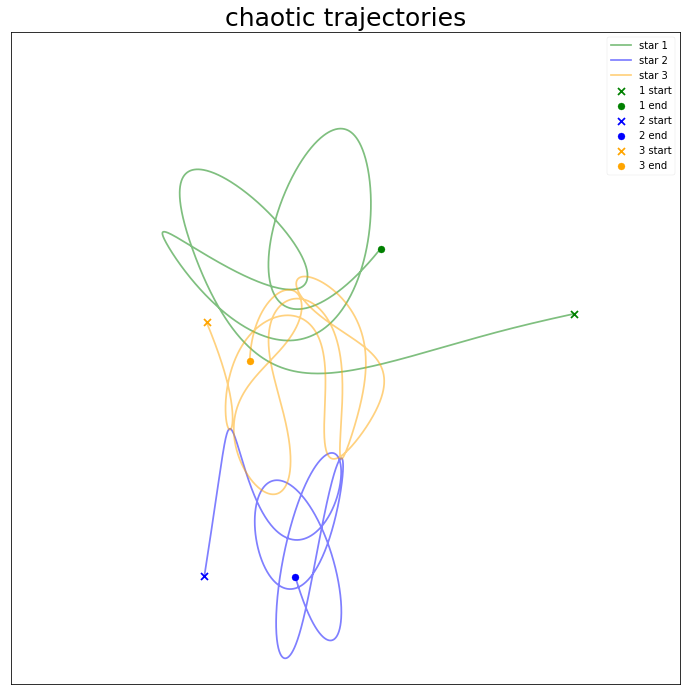

In [288]:
color = ['green', 'blue', 'orange']
_mass = 4*np.pi*np.pi 
mass = [150,200,250]
v = 4.8
#y_0 = np.array([[3., 1., 1.0, 0.],[-1., -2., 5.0, -0.],[-1., 1., -3., -0.]]).flatten()
y_0 = np.array([[3., 1., 0.0, 0.],[-1., -2., 0.0, -0.],[-1., 1., -0., -0.]]).flatten()
y,t = ada_integrateall(rk4, ODEplanets, y_0, 0, 2.1, 0.1, intermediate=True)

z = y.reshape(y.shape[0],-1,4)[:,:,:]
s = 3
plt.figure(figsize = (12,12))
for i in range(z.shape[1]):
    z1 = z[:,i,:]
    plt.plot(z1[:,0],z1[:,1], alpha=0.5, color=color[i])
    plt.ylim(-s,+s+1)
    plt.xlim(-s,+s+1)
    #plt.axis('equal')
    plt.scatter(z1[0,0],z1[0,1], color = color[i], marker='x')
    plt.scatter(z1[-1,0],z1[-1,1], color =  color[i])
plt.title('chaotic trajectories')
plt.xticks([], [])
plt.yticks([], [])
plt.legend(['star 1','star 2','star 3','1 start','1 end',
            '2 start','2 end','3 start','3 end'])
plt.show()

In diesem System gibt es keine stabilen Umlaufbahnen und das System verhält sich im Kompletten chaotisch. Man kann zeigen, dass in einem Drei-Körper-System keine stabilen Bahnen möglich sind, solange die Körper alle ähnliche Massen besitzen.

In [297]:
#def integrateall(method, ode, y0, t0, tend, N, intermediate=False)
_mass = 4*np.pi*np.pi 
mass = [200,200,0.01]
v = 4.8
#y_0 = np.array([[0., 1., -5.0, 0.],[-0., -1., 5.0, -0.],[-3., -1., +5., -10.]]).flatten()
y_0 = np.array([[0., 1., -5.0, 0.],[-0., -1., 5.0, -0.],[-0., -2., +15., -10.]]).flatten()
#y,t = ada_integrateall(rk4, ODEplanets, y_0, 0, 3, 0.1, intermediate=True)
y,t = integrateall(rk4, ODEplanets, y_0, 0, 3, 50000, intermediate=True)

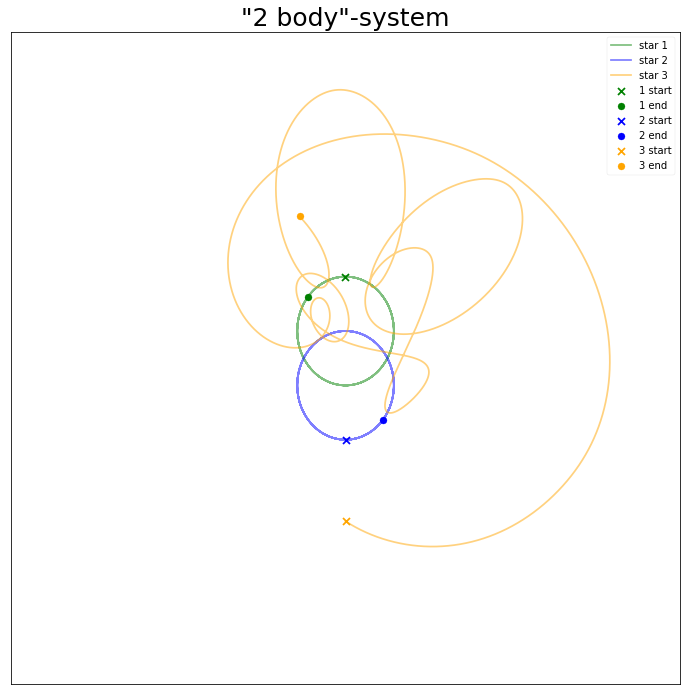

In [298]:
z = y.reshape(y.shape[0],-1,4)[:,:,:]
s = 4
plt.figure(figsize = (12,12))
for i in range(z.shape[1]):
    z1 = z[:,i,:]
    plt.plot(z1[:,0],z1[:,1], alpha=0.5, color=color[i])
    plt.ylim(-s,+s)
    plt.xlim(-s,+s)
    #plt.axis('equal')
    plt.scatter(z1[0,0],z1[0,1], color = color[i], marker='x')
    plt.scatter(z1[-1,0],z1[-1,1], color =  color[i])
plt.title('"2 body"-system')
plt.xticks([], [])
plt.yticks([], [])
plt.legend(['star 1','star 2','star 3','1 start','1 end',
            '2 start','2 end','3 start','3 end'])
plt.show()

In diesem Beispiel ist einer der Körper viel leichter als die beiden anderen. Man sieht wie die beiden großen (gleich schweren) Sterne ein stabiles System bilden, während der Planet eine chaotische Umlaufbahn um die das Gesamtsystem aufweist und letztendlich aus dem System katapultiert wird.

# Stuff

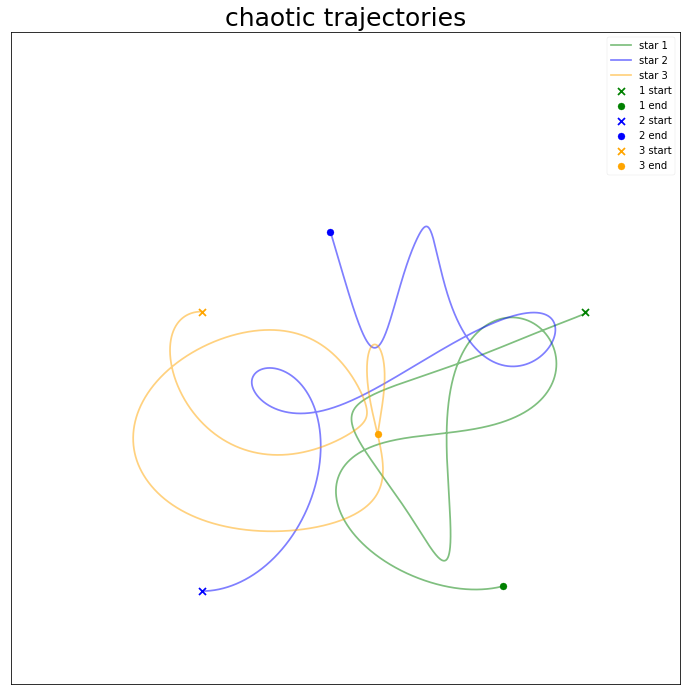

In [264]:
color = ['green', 'blue', 'orange']
_mass = 4*np.pi*np.pi 
mass = [150,200,250]
v = 4.8
y_0 = np.array([[3., 1., 1.0, 0.],[-1., -2., 5.0, -0.],[-1., 1., -3., -0.]]).flatten()
y,t = integrateall(rk4, ODEplanets, y_0, 0, 1.5, 20000, intermediate=True)

z = y.reshape(y.shape[0],-1,4)[:,:,:]
s = 3
plt.figure(figsize = (12,12))
for i in range(z.shape[1]):
    z1 = z[:,i,:]
    plt.plot(z1[:,0],z1[:,1], alpha=0.5, color=color[i])
    plt.ylim(-s,+s+1)
    plt.xlim(-s,+s+1)
    #plt.axis('equal')
    plt.scatter(z1[0,0],z1[0,1], color = color[i], marker='x')
    plt.scatter(z1[-1,0],z1[-1,1], color =  color[i])
plt.title('chaotic trajectories')
plt.xticks([], [])
plt.yticks([], [])
plt.legend(['star 1','star 2','star 3','1 start','1 end',
            '2 start','2 end','3 start','3 end'])
plt.show()